# Predict Project Success

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline

## Get the Data


In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [6]:
test.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890


## Exploratory Data Analysis

### Check Null values

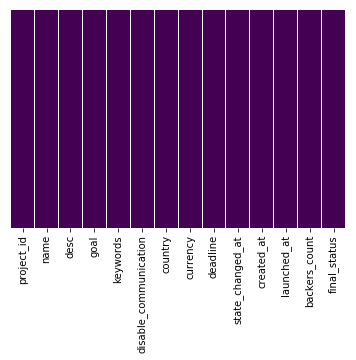

In [7]:
# train
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

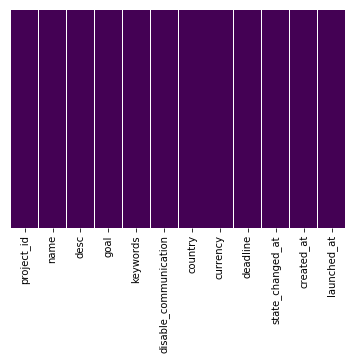

In [8]:
# test
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

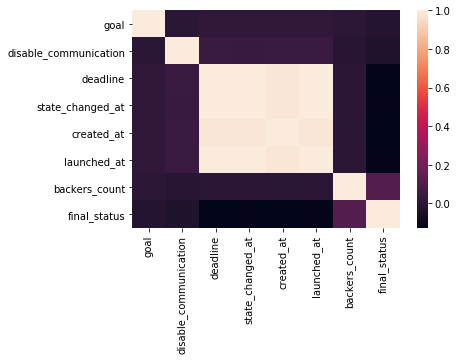

In [9]:
sns.heatmap(train.corr())

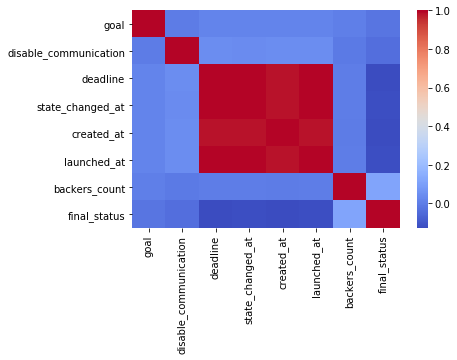

In [11]:
sns.heatmap(train.corr(),cmap='coolwarm')

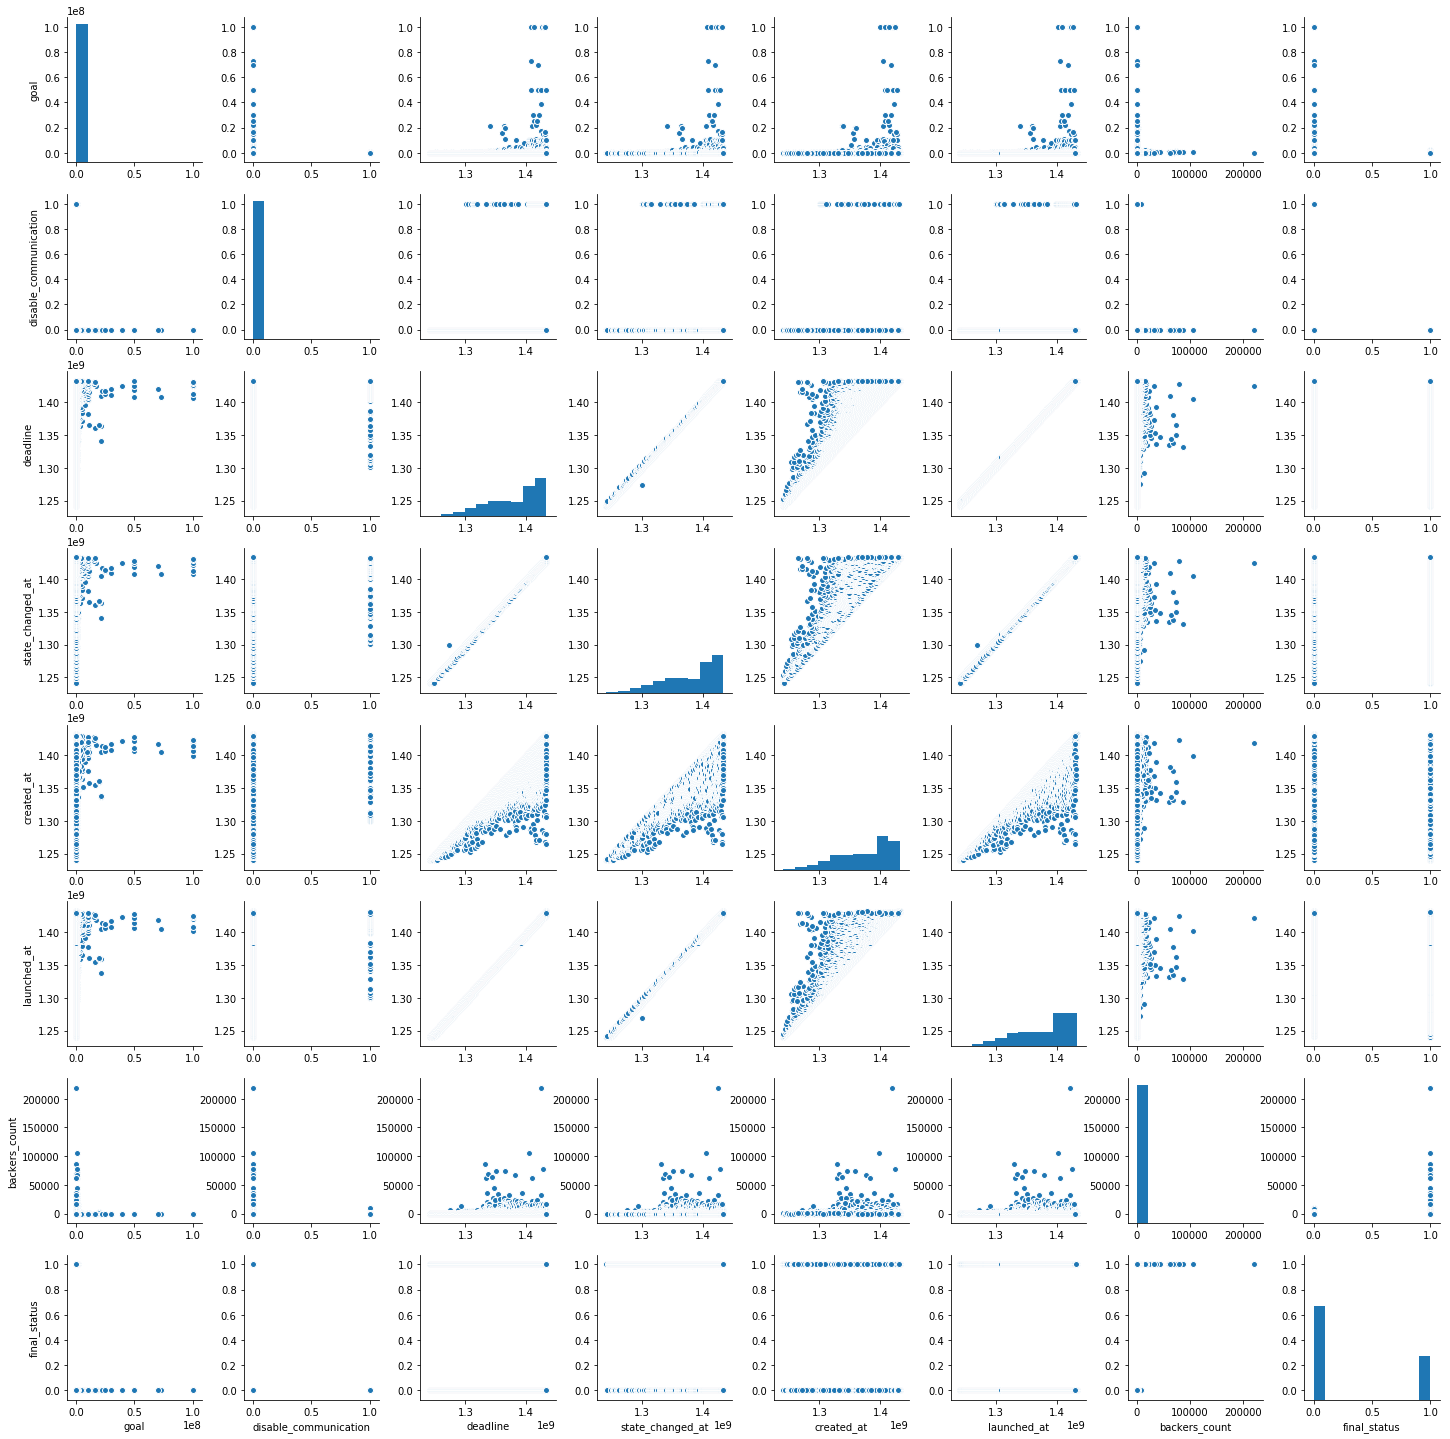

In [16]:
sns.pairplot(train)

## For Duplicate Columns

In [17]:
train_enc = pd.DataFrame(index= train.index)


In [18]:
for col in tqdm_notebook(train.columns):
    train_enc[col] = train[col].factorize()[0]

In [19]:
dup_col = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i+1 :]:
        if c2 not in dup_col and np.all(train_enc[c1] == train_enc[c2]):
            dup_col[c2]=c1

In [20]:
dup_col

{'keywords': 'project_id'}

In [21]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [22]:
### Minumum of goal column

In [23]:
train['goal'].min()

0.01

In [24]:
test.isnull().sum(axis=0)

project_id               0
name                     0
desc                     4
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
dtype: int64

# Data Cleaning

## Date Feature

In [26]:
import datetime

### Convert Unix date into Datetime

In [28]:
train['deadline'] = pd.to_datetime(train['deadline'],unit='s')
train['state_changed_at'] = pd.to_datetime(train['state_changed_at'],unit='s')
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')
train['launched_at'] = pd.to_datetime(train['launched_at'],unit='s')

### Adding new features in dataset

In [30]:
#for Before
train['before'] = (train['deadline'] - train['launched_at'])
train['before'] = train['before'].apply(lambda x: (x.total_seconds())/60)

In [31]:
train['state_changed_deadline'] = train['state_changed_at'] - train['deadline']
train['state_changed_deadline'] = train['state_changed_deadline'].apply(lambda x: (x.total_seconds())/60)

In [32]:
train['launched_created'] = train['launched_at'] - train['created_at']
train['launched_created'] = train['launched_created'].apply(lambda x: (x.total_seconds())/60)

In [33]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,before,state_changed_deadline,launched_created
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,12187.933333,0.300000,36.933333
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,24223.466667,50.300000,256.133333
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0,14386.033333,4.300000,13.083333
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50,18,1,43150.166667,6.350000,48.916667
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21,1,0,43155.650000,7.283333,43.783333


### Convert disable_communication column into 1 and 0

In [36]:
train['disable_communication'] = train['disable_communication'].astype(int)

In [37]:
train['country'].value_counts()

US    92033
GB     8758
CA     3736
AU     1880
NL      705
NZ      355
SE      240
DK      196
NO      114
IE      111
DE        1
Name: country, dtype: int64

### Label Encoding to deal with catogorical features

In [41]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["Country"] = lb_make.fit_transform(train["country"])


In [42]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["Currency"] = lb_make.fit_transform(train["currency"])


In [43]:
train['desc'].isnull().sum()

9

In [44]:
#train['desc_token'] = train.desc.str.strip().str.split('[\W_]+')

### Calculate the length of the words in Keyword column and make a new column

In [47]:
train['Keyword'] = train.keywords.apply(len)

In [48]:
train.fillna('dummy', inplace=True)

In [49]:
#train['Desc_len'] = train.desc.apply(len)

## Drop unnecessary columns

In [50]:
drop_columns = ['project_id', 'name', 'desc', 'keywords', 'country', 'currency', 'deadline', 'state_changed_at','created_at', 'launched_at']

In [51]:
train.drop(drop_columns, inplace=True, axis=1)

## Train data after cleaning

In [58]:
train.head()

,goal,disable_communication,backers_count,final_status,before,state_changed_deadline,launched_created,Country,Currency,Keyword
0,20.0,0,3,1,12187.933333,0.300000,36.933333,10,8,19
1,300.0,0,2,0,24223.466667,50.300000,256.133333,10,8,74
2,30.0,0,0,0,14386.033333,4.300000,13.083333,10,8,12
3,500.0,0,18,1,43150.166667,6.350000,48.916667,10,8,29
4,2000.0,0,1,0,43155.650000,7.283333,43.783333,10,8,38


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 10 columns):
goal                      108129 non-null float64
disable_communication     108129 non-null int64
backers_count             108129 non-null int64
final_status              108129 non-null int64
before                    108129 non-null float64
state_changed_deadline    108129 non-null float64
launched_created          108129 non-null float64
Country                   108129 non-null int64
Currency                  108129 non-null int64
Keyword                   108129 non-null int64
dtypes: float64(4), int64(6)
memory usage: 8.2 MB


# To clean Test data

In [60]:
test['deadline'] = pd.to_datetime(test['deadline'],unit='s')
test['state_changed_at'] = pd.to_datetime(test['state_changed_at'],unit='s')
test['created_at'] = pd.to_datetime(test['created_at'],unit='s')
test['launched_at'] = pd.to_datetime(test['launched_at'],unit='s')

#for Before
test['before'] = (test['deadline'] - test['launched_at'])
test['before'] = test['before'].apply(lambda x: (x.total_seconds())/60)

test['state_changed_deadline'] = test['state_changed_at'] - test['deadline']
test['state_changed_deadline'] = test['state_changed_deadline'].apply(lambda x: (x.total_seconds())/60)

test['launched_created'] = test['launched_at'] - test['created_at']
test['launched_created'] = test['launched_created'].apply(lambda x: (x.total_seconds())/60)

test['disable_communication'] = test['disable_communication'].astype(int)

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Country"] = lb_make.fit_transform(test["country"])

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Currency"] = lb_make.fit_transform(test["currency"])

test['Keyword'] = test.keywords.apply(len)



In [61]:
drop_columns1 = ['name', 'desc', 'keywords', 'country', 'currency', 'deadline', 'state_changed_at','created_at', 'launched_at']

In [62]:
test.drop(drop_columns1, inplace=True, axis=1)

In [63]:
test.head()

,project_id,goal,disable_communication,before,state_changed_deadline,launched_created,Country,Currency,Keyword
0,kkst917493670,7000.0,0,57660.000000,0.000000,2616.733333,20,12,8
1,kkst1664901914,35000.0,0,50400.000000,0.000000,1904.950000,20,12,16
2,kkst925125077,49500.0,0,51809.533333,0.000000,1512.866667,20,12,43
3,kkst1427645275,40000.0,0,43200.000000,0.200000,24378.133333,20,12,49
4,kkst1714249266,20000.0,0,62232.500000,0.066667,42826.900000,20,12,18


In [64]:
train.drop('backers_count', inplace=True, axis=1)

# Modeling

# Import train test split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = train.drop('final_status', axis=1)
y = train['final_status']
training, valid, ytraning, yvalid = train_test_split(X, y, test_size=0.5, random_state=42)

### Import modules

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## Stacking Ensemble Method

In [69]:
model1 = RandomForestClassifier()
model2 = XGBClassifier()

In [70]:
model1.fit(training, ytraning)
model2.fit(training, ytraning)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
pred1 = model1.predict(valid)
pred2 = model2.predict(valid)

In [72]:
X_test = test.drop('project_id', axis=1)

In [73]:
test_pred1 = model1.predict(X_test)

In [74]:
test_pred2 = model2.predict(X_test)

In [75]:
stacked_pred = np.column_stack((pred1, pred2))
stacked_pred_test = np.column_stack((test_pred1, test_pred2))

#### Using Random Forest as a Meta Model

In [76]:
meta_model = RandomForestClassifier()

In [77]:
meta_model.fit(stacked_pred, yvalid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
final_prediction = meta_model.predict(stacked_pred_test)

In [79]:
meta_model.score(stacked_pred, yvalid)

0.69203736243410707

# For submission file

In [ ]:
submission = pd.DataFrame({    
    "project_id": test["project_id"],
    "final_status": final_prediction,
    })
submission.to_csv('submission_1.csv', index=False, columns=['project_id', 'final_status'])